In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv


# Load dataset

In [8]:
train_df = pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s4e5/test.csv")
train_df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


# EDA

In [9]:
train_df.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [11]:
num_cols = train_df.select_dtypes(exclude=["object"]).columns
print(num_cols)

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')


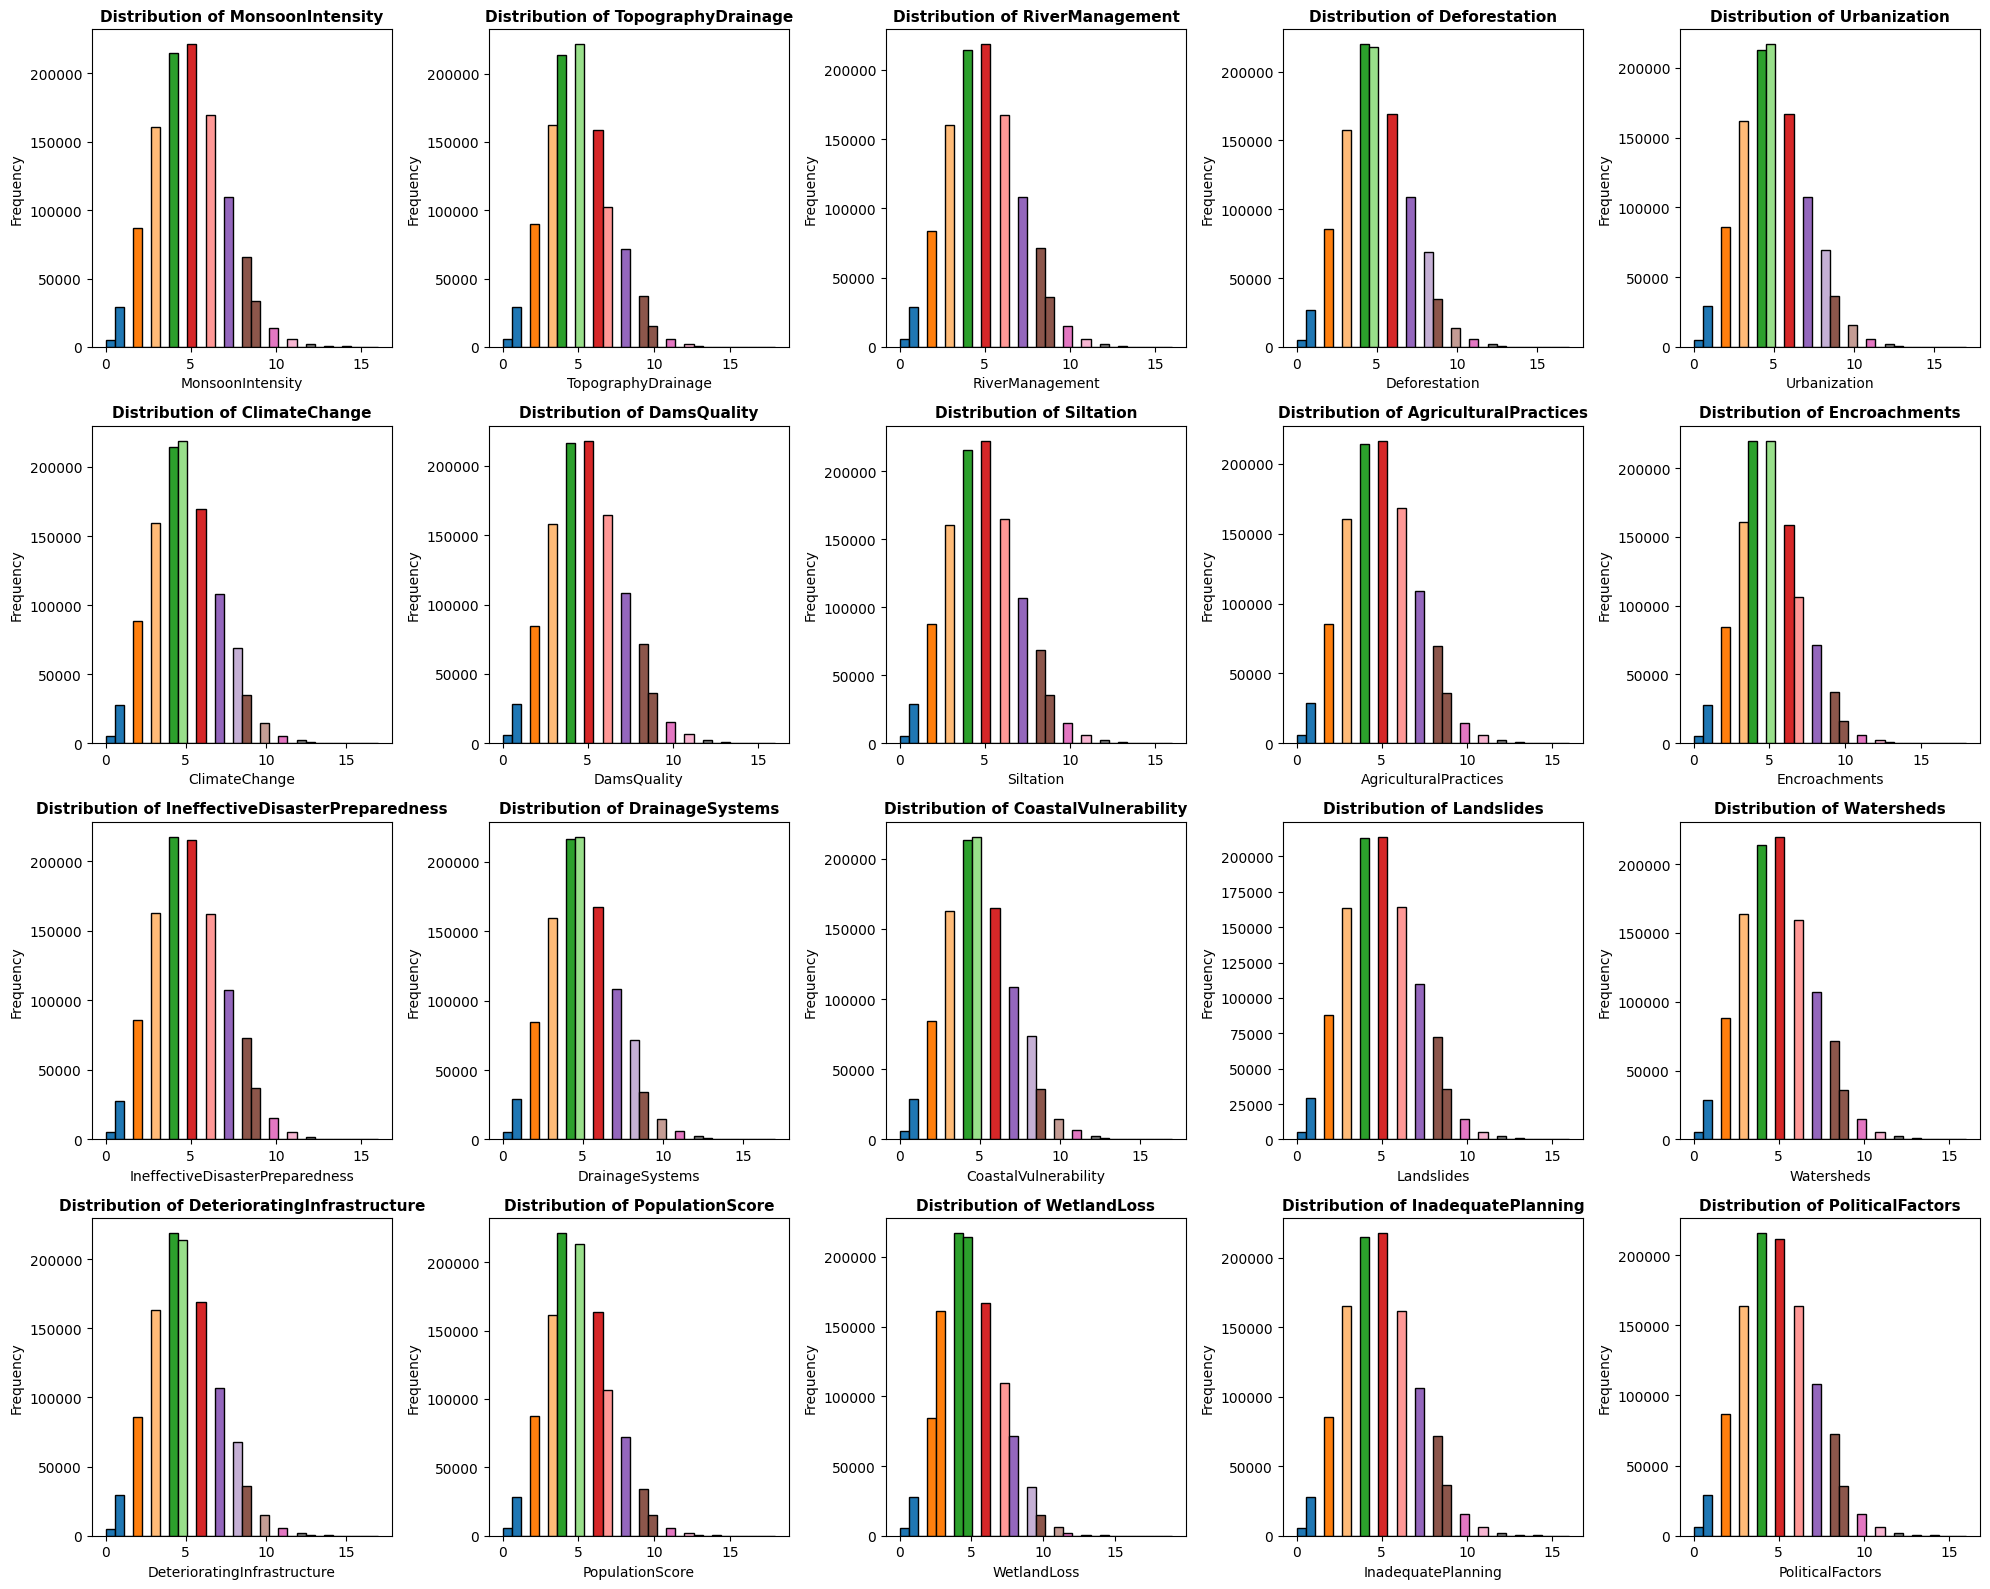

In [12]:
import matplotlib.pyplot as plt
num_cols = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors']
num_features = [col for col in num_cols if col != 'id']
n = len(num_features)

# Define grid size (rows, cols)
rows = (n // 5) + (n % 5 > 0)   # 5 plots per row
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(num_features):
    counts, bins, patches = axes[i].hist(train_df[col], bins=30, edgecolor='black')

    # Give each bar its own color
    for j, patch in enumerate(patches):
        patch.set_facecolor(plt.cm.tab20(j / len(patches)))  # try tab20 colormap

    axes[i].set_title(f"Distribution of {col}", fontsize=11, fontweight="bold")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Remove empty plots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [13]:
import numpy as np
from scipy import stats

num_cols = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors']

# calculate z-scores
z_scores = np.abs(stats.zscore(train_df[num_cols]))
threshold = 3

# boolean DataFrame of outliers
outliers = (z_scores > threshold)

# count outliers per column
outlier_counts = outliers.sum(axis=0)
print("Outliers per column:")
print(outlier_counts)

# total number of outlier cells
print("\nTotal outlier values:", outliers.sum().sum())

Outliers per column:
[3393 3398 3267 3234 3495 3186 3594 3379 3106 3396 3220 3501 3607 3247
 3511 3183 3438 3273 3380 3375]

Total outlier values: 67183


In [14]:
for i, col in enumerate(num_cols):
    col_mean = train_df[col].mean()
    col_std = train_df[col].std()
    upper_limit = col_mean + threshold * col_std
    lower_limit = col_mean - threshold * col_std
    
    train_df[col] = np.where(train_df[col] > upper_limit, upper_limit,
                 np.where(train_df[col] < lower_limit, lower_limit, train_df[col]))

    # transform test using same limits
    test_df[col] = np.where(test_df[col] > upper_limit, upper_limit,
               np.where(test_df[col] < lower_limit, lower_limit, test_df[col]))


# Feature engeneering

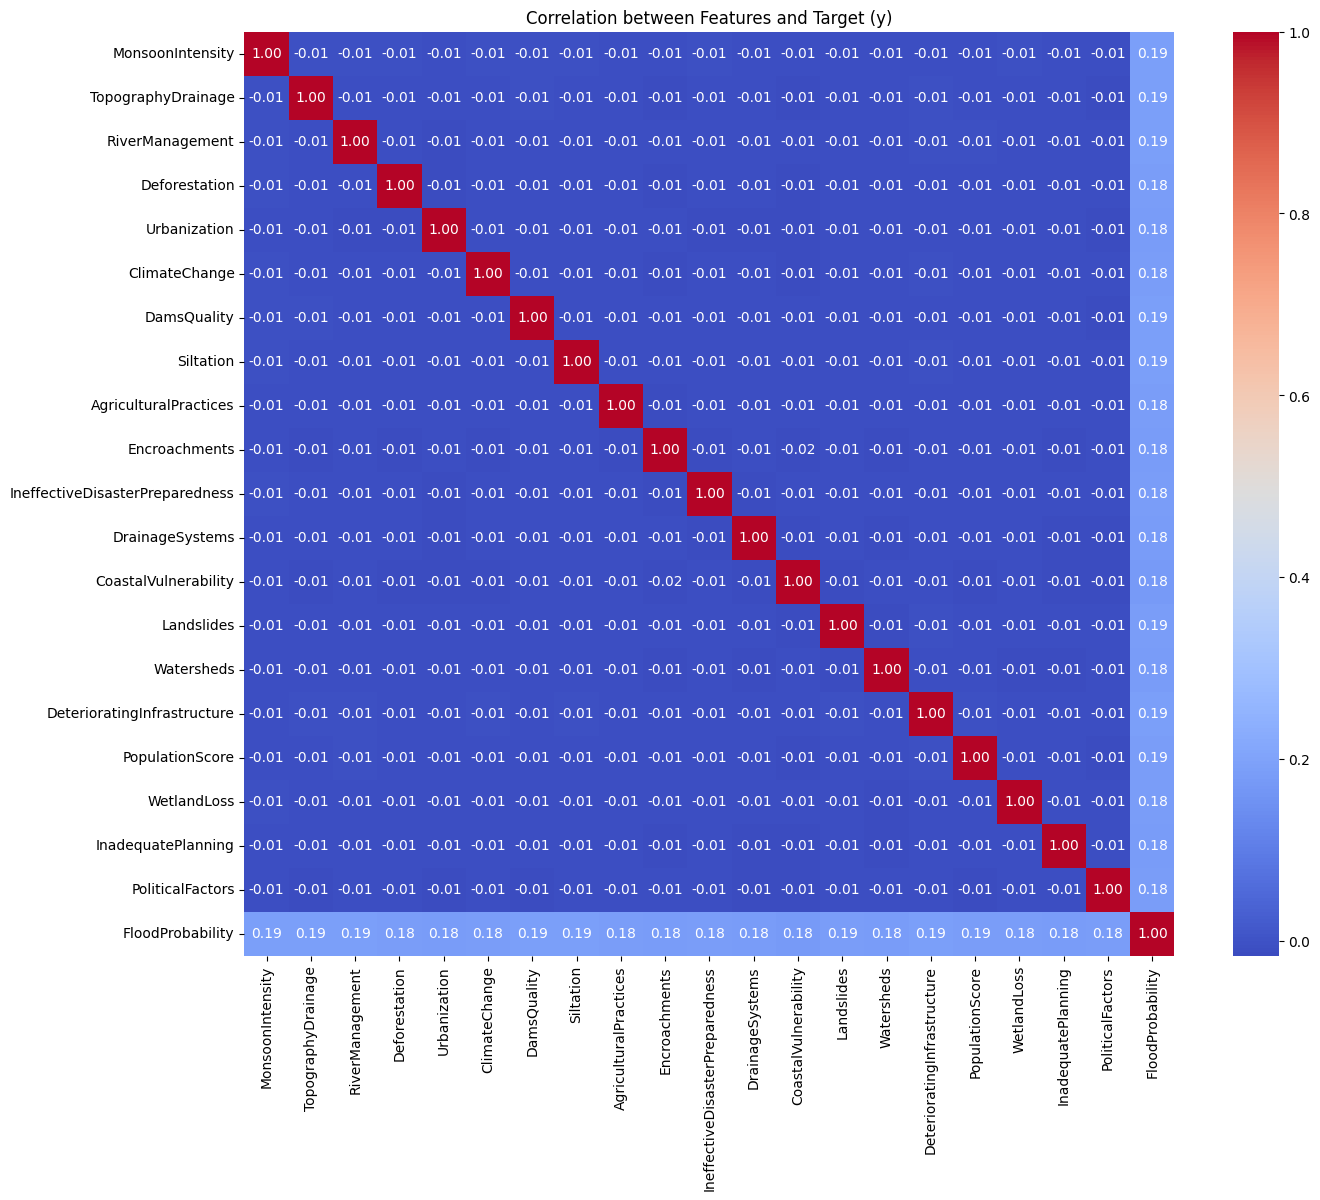

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# pick only numeric + encoded target
cols = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability']

# compute correlation
df_corr = train_df[cols].copy()
corr = df_corr.corr()

# plot heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Features and Target (y)")
plt.show()

# Split dataset

In [16]:
##  Drop target column

X = train_df.drop(columns = 'FloodProbability')
y = train_df['FloodProbability'] 

In [17]:
## Split train set to train and validation set with 80:20 ratio
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,random_state=42)

In [18]:
print(f"X_train shape: {X_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_valid shape: {y_valid.shape}")

X_train shape: (894365, 21)
X_valid shape: (223592, 21)
y_train shape: (894365,)
X_valid shape: (223592,)


#  Scaling

In [19]:
## Apply min max scaler to train, valid and test set
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

scaler = MinMaxScaler()

# Save id column separately
train_id = X_train['id']
valid_id = X_valid['id']
test_id = test_df['id']

# Drop id before scaling
X_train_noid = X_train.drop(columns=['id'])
X_valid_noid = X_valid.drop(columns=['id'])
test_noid = test_df.drop(columns=['id'])

# Scale
X_train = pd.DataFrame(scaler.fit_transform(X_train_noid), 
                       index=X_train.index, columns=X_train_noid.columns)
X_valid = pd.DataFrame(scaler.transform(X_valid_noid), 
                       index=X_valid.index, columns=X_valid_noid.columns)
test_df = pd.DataFrame(scaler.transform(test_noid), 
                       index=test_df.index, columns=test_noid.columns)

# Add id back as first column
X_train.insert(0, 'id', train_id.values)
X_valid.insert(0, 'id', valid_id.values)
test_df.insert(0, 'id', test_id.values)

In [20]:
X_train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
805665,805665,0.721331,0.624537,0.626573,0.540672,0.357376,0.270092,1.000000,0.719052,0.269100,...,0.447241,0.537447,0.534726,0.537334,0.447379,0.449626,0.179371,0.537782,0.357655,0.624439
863045,863045,0.631165,0.356878,0.358042,0.180224,0.357376,0.450154,0.624717,0.269644,0.538201,...,0.178896,0.537447,0.445605,0.000000,0.536854,0.179851,0.448429,0.358521,0.268241,0.356823
496045,496045,0.540998,0.446098,0.089510,0.540672,0.536064,0.630215,0.267736,0.449407,0.538201,...,0.357793,0.447872,0.623847,0.537334,0.447379,0.359701,0.807171,0.268891,0.447069,0.267617
1079364,1079364,0.360665,0.535317,0.537063,0.270336,0.268032,0.270092,0.089245,0.449407,0.358801,...,0.626137,0.806170,0.534726,0.179111,0.447379,0.359701,0.627800,0.627412,0.357655,0.089206
191800,191800,0.540998,0.267659,0.716084,0.180224,0.625408,0.360123,0.535472,0.539289,0.627901,...,0.268344,0.447872,0.178242,0.537334,0.536854,0.449626,0.448429,0.358521,0.357655,0.892056


# Model training

## Linear regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predictions
y_pred = reg.predict(X_valid)

# R² Score
print("R² Score:", r2_score(y_valid, y_pred))

R² Score: 0.8441505342096318


## Ridge Regression

In [22]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("Ridge R²:", ridge.score(X_valid, y_valid))

Ridge R²: 0.8441505246242219


## Bayesian Regression

In [23]:
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()
br.fit(X_train, y_train)
print("Bayesian Ridge R²:", br.score(X_valid, y_valid))

Bayesian Ridge R²: 0.8441505333264369


## LassoCV

In [24]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=np.logspace(-4, 2, 50), cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

print("Best alpha:", lasso_cv.alpha_)
print("CV R²:", lasso_cv.score(X_valid, y_valid))

Best alpha: 0.0001
CV R²: 0.8413346054799169


# Feature Importance

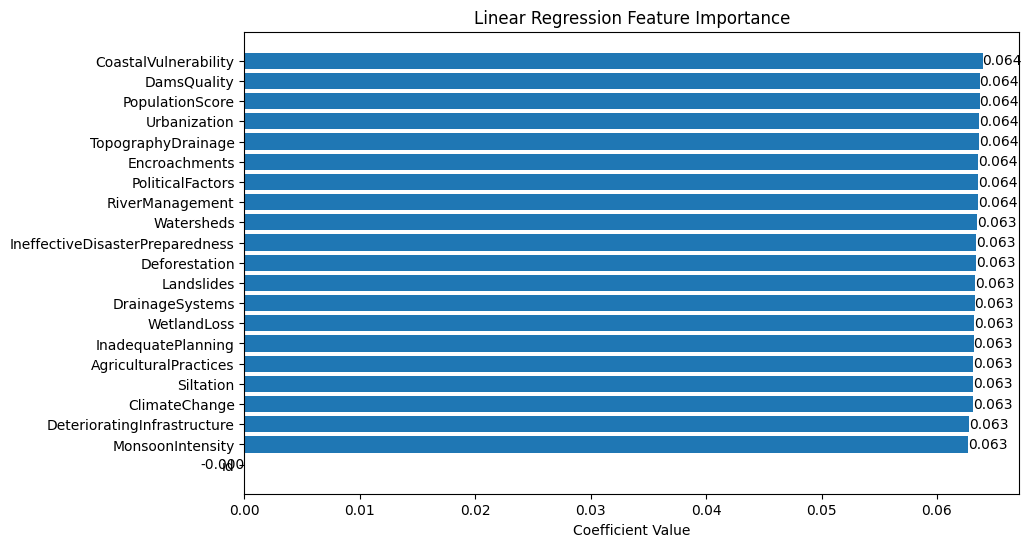

In [25]:
# Feature importance dataframe
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,   # works if X_train is a pandas DataFrame
    'Coefficient': reg.coef_
})
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])

# Add numbers (coefficients) on bars
for bar, coef in zip(bars, feature_importance['Coefficient']):
    plt.text(bar.get_width(), 
             bar.get_y() + bar.get_height()/2,
             f"{coef:.3f}",  # show up to 3 decimals
             va='center',
             ha='left' if coef >= 0 else 'right')  # put text on correct side

plt.xlabel("Coefficient Value")
plt.title("Linear Regression Feature Importance")
plt.gca().invert_yaxis()  # biggest on top
plt.show()

# Submission

In [26]:
y_test = reg.predict(test_df)    ## Linear regression

In [29]:
import pandas as pd

# Load sample submission
submission_df = pd.read_csv('/kaggle/input/playground-series-s4e5/sample_submission.csv')  

# Fill predictions
submission_df['FloodProbability'] = y_test

# Save file for submission
submission_df.to_csv('submission.csv', index=False)
print("Submission file saved as submission.csv")

submission_df.head()

Submission file saved as submission.csv


,id,FloodProbability
0,1117957,0.574438
1,1117958,0.455492
2,1117959,0.454957
3,1117960,0.466430
4,1117961,0.466396
